## Import Library

In [1]:
# Import Library
import warnings # To hide warnings
import numpy as np  # Data 
import pandas as pd # Dataframe 
import matplotlib.pyplot as plt # For graphics
import seaborn as sns
from sklearn.preprocessing import StandardScaler#For Normalizing data
from sklearn.cluster import KMeans #For clustering
import os                    
import sys    
from sklearn.decomposition import PCA #For Transforming data to PCA

## Load Metrics Data from excel file

In [2]:
xls = pd.ExcelFile('CKMetrics.xlsx')
df_piccasso = pd.read_excel(xls, 'Picasso_2.8') 
df_android = pd.read_excel(xls, 'AndroidUIL_1.9.5')
df_photoview = pd.read_excel(xls, 'PhotoView_2.0')

## Functions for data preprocessing, Principal Component Analysis, K-Means Clustering

In [3]:
#To drop unneeded columns
def processDataFrame(dataframe):
    new_df = dataframe.drop(['Kind', 'Name'], axis=1)
    return new_df

# To visualize data
def visualizeData (dataframe, title):
    f, ax = plt.subplots(figsize=(7, 5))
    corr = dataframe.corr()
    sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f', linewidths=.05)
    t= f.suptitle(title, fontsize=15)   
    
    
# To preprocess Train data
def processTrainData(dataframe):
    ss = StandardScaler()
    X =ss.fit_transform(dataframe)
    pca = PCA(n_components=2)
    principalComponents = pca.fit_transform(X)
    pca_df = pd.DataFrame(data = principalComponents
             , columns = ['PCA1', 'PCA2'])
    return pca_df

#To build K-Mean Model
def initializeModel():
    model = KMeans(n_clusters=3, init='k-means++',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=1099, verbose=0, algorithm='full')
    return model

#To fit model
def fitModel(trainData, model):
    model.fit(trainData)
    return model

#To cluster and predict quality
def predictQuality(trainData, model):
    pred_label = model.predict(trainData)
    centroids = model.cluster_centers_
    inertia = model.n_iter_
    numIter = model.inertia_
    return centroids, pred_label, inertia, numIter

#To save cluster number and predicted quality to a new dataframe
def saveValues(trainData, dataframe, labels, title):
    new_df = dataframe
    new_df['Assigned_Cluster'] = labels
    new_df['PCA1'] = trainData['PCA1']
    new_df['PCA2'] = trainData['PCA2']
    new_df.loc[new_df['Assigned_Cluster']==0,'Predicted_Quality'] = 'High'
    if title == "Picasso":
        new_df.loc[new_df['Assigned_Cluster']==1,'Predicted_Quality'] = 'High'
        new_df.loc[new_df['Assigned_Cluster']==0,'Predicted_Quality'] = 'Medium'
        new_df.loc[new_df['Assigned_Cluster']==2,'Predicted_Quality'] = 'Low'
    else:
        new_df.loc[new_df['Assigned_Cluster']==0,'Predicted_Quality'] = 'High'
        new_df.loc[new_df['Assigned_Cluster']==2,'Predicted_Quality'] = 'Medium'
        new_df.loc[new_df['Assigned_Cluster']==1,'Predicted_Quality'] = 'Low'
    return new_df

#To visualize predicted clusters
def showClusters(new_df, title, centroids):
    fig = plt.figure(figsize = (4,4))
    ax = fig.add_subplot(1,1,1) 
    ax.set_xlabel('Principal Components 1', fontsize = 10)
    ax.set_ylabel('Principal Components 2', fontsize = 10)
    ax.set_title('K-Means Clustering_' + title, fontsize = 13)
    targets = ['Low', 'Medium', 'High']
    colors = ['c', 'b', 'm']
    for target, color in zip(targets,colors):
        indicesToKeep = new_df['Predicted_Quality'] == target
        ax.scatter(new_df.loc[indicesToKeep, 'PCA1']
               , new_df.loc[indicesToKeep, 'PCA2'], alpha=0.5
               , c = color 
               , s = 30)
        ax.legend(['Low Quality', 'Medium Quality', 'High Quality'])
    #plt.scatter(centroids[:,0] ,centroids[:,1], color='red', s=50, marker ='*')
   
     

## 1. Picasso 2.8

In [4]:
df_piccasso_X = processDataFrame(df_piccasso)

In [5]:
df_piccasso_X.describe()

,WMC,DIT,NOC,RFC,CBO,LCOM
count,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000
mean,10.882759,1.496552,0.358621,9.013793,3.455172,20.565517
std,22.274956,0.708325,1.315906,13.134447,4.962329,31.549083
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000
50%,4.000000,1.000000,0.000000,4.000000,2.000000,0.000000
75%,9.000000,2.000000,0.000000,11.000000,4.000000,50.000000
max,130.000000,3.000000,8.000000,83.000000,27.000000,100.000000


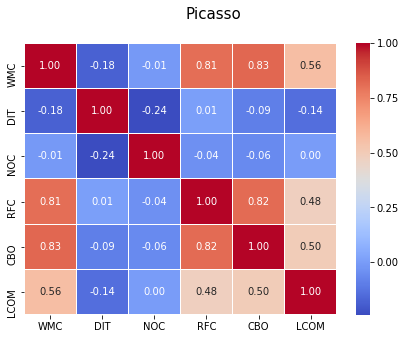

In [6]:
visualizeData(df_piccasso_X, "Picasso")

In [7]:
pca_df_piccasso = processTrainData(df_piccasso_X)
pca_df_piccasso.head()

,PCA1,PCA2
0,-0.106542,1.554176
1,0.848932,0.832203
2,1.288318,3.060351
3,-0.927674,-0.671927
4,-1.116386,-0.643787


In [8]:
pca_df_piccasso.describe()

,PCA1,PCA2
count,1.450000e+02,1.450000e+02
mean,-4.440892e-17,-1.715103e-16
std,1.753526e+00,1.125990e+00
min,-1.246892e+00,-1.883643e+00
25%,-1.009980e+00,-6.583686e-01
50%,-5.574653e-01,2.052493e-02
75%,2.432732e-01,3.614240e-01
max,8.570347e+00,5.581328e+00


In [9]:
model1 = initializeModel()
piccasso_model = fitModel(pca_df_piccasso, model1)
centroids_piccasso, labels_piccasso, inertia_piccasso, numIter_piccasso = predictQuality(pca_df_piccasso, piccasso_model)

In [10]:
print(labels_piccasso)
print(centroids_piccasso)
print(inertia_piccasso)
print(numIter_piccasso)

[0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 2 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 0 1 1 1 1 1 1 1 1 1 2 1 2 1 1 1 1 1 1 1 1 1 2 1 1 2 1 1 2 2 1 1 1 1
 1 1 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0]
[[-0.66313836  2.78389869]
 [-0.33772687 -0.27092963]
 [ 6.27168986  0.05742746]]
6
188.93988762095847


In [11]:
new_df_piccasso= saveValues(pca_df_piccasso, df_piccasso,labels_piccasso, "Picasso")
new_df_piccasso.head()

,Kind,Name,WMC,DIT,NOC,RFC,CBO,LCOM,Assigned_Cluster,PCA1,PCA2,Predicted_Quality
0,Abstract Class,com.example.picasso.PicassoSampleActivity,7,2,4,6,2,50,0,-0.106542,1.554176,Medium
1,Abstract Class,com.squareup.picasso.RemoteViewsAction,11,2,3,21,5,45,1,0.848932,0.832203,High
2,Abstract Generic Class,com.squareup.picasso.Action,15,1,5,14,5,85,0,1.288318,3.060351,Medium
3,Anonymous Class,com.example.picasso.PicassoSampleActivity.onCr...,1,2,0,1,3,0,1,-0.927674,-0.671927,High
4,Anonymous Class,com.example.picasso.PicassoSampleActivity.onCr...,2,2,0,1,1,0,1,-1.116386,-0.643787,High


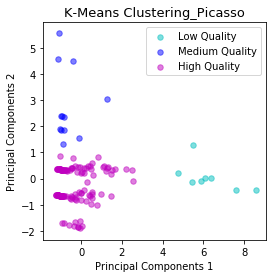

In [12]:
showClusters(new_df_piccasso, "Picasso", centroids_piccasso)

## Android UIL 1.9.5

In [13]:
df_android_X = processDataFrame(df_android)

In [14]:
df_android_X.describe()

,WMC,DIT,NOC,RFC,CBO,LCOM
count,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000
mean,10.652893,1.479339,0.239669,22.636364,6.702479,25.776860
std,17.289067,0.696410,0.836907,12.199727,6.605105,32.329679
min,0.000000,1.000000,0.000000,13.000000,0.000000,0.000000
25%,2.000000,1.000000,0.000000,15.000000,3.000000,0.000000
50%,5.000000,1.000000,0.000000,19.000000,5.000000,0.000000
75%,12.000000,2.000000,0.000000,25.000000,8.000000,52.000000
max,120.000000,4.000000,6.000000,94.000000,39.000000,91.000000


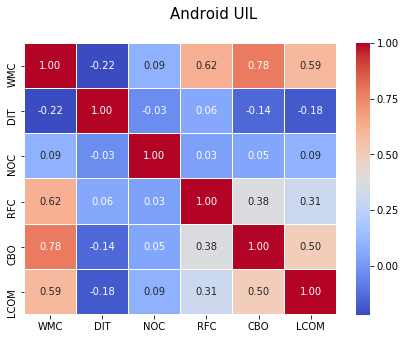

In [15]:
visualizeData(df_android_X, "Android UIL")

In [16]:
pca_df_android = processTrainData(df_android_X)
pca_df_android.head()

,PCA1,PCA2
0,2.154672,-1.264575
1,1.448521,1.060950
2,-0.876674,1.060166
3,6.684223,0.243363
4,-1.115793,-0.717210


In [17]:
pca_df_android.describe()

,PCA1,PCA2
count,1.210000e+02,1.210000e+02
mean,-4.524618e-17,-9.909429e-17
std,1.644990e+00,1.033546e+00
min,-1.661934e+00,-2.887585e+00
25%,-1.026829e+00,-7.185817e-01
50%,-4.020864e-01,-4.529372e-01
75%,5.175536e-01,6.145041e-01
max,8.141200e+00,3.425154e+00


In [18]:
model1 = initializeModel()
android_model = fitModel(pca_df_android, model1)
centroids_android, labels_android, inertia_android, numIter_android = predictQuality(pca_df_android,android_model)

In [19]:
print(labels_android)
print(centroids_android)
print(inertia_android)
print(numIter_android)

[1 2 2 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 2 0 2 2 0 0 2 2 1 0 0 1 1 1 2 0 1 0 0
 1 0 0 1 2 0 0 0 0 0 0 0 0 0 2 2 1 0 2 2 0 1 0 0 0 0 2 0 0 0 2 2 0 1 0 2 0
 0 0 0 0 0 0 2 2 2 2 0 2 2 2 0 2 2 0 2 0 2 2 2 2 2 2 0 0 2 2 2 2 0 2 2 2 2
 2 2 2 0 0 0 0 0 0 0]
[[-0.34611089 -0.6973039 ]
 [ 3.73549388 -0.16871299]
 [-0.60023462  1.06410724]]
11
166.67396628386126


In [20]:
new_df_android= saveValues(pca_df_android, df_android,labels_android, "Android UIL")
new_df_android.head()

,Kind,Name,WMC,DIT,NOC,RFC,CBO,LCOM,Assigned_Cluster,PCA1,PCA2,Predicted_Quality
0,Public Abstract Class,com.nostra13.universalimageloader.cache.disc.i...,24,1,2,27,13,82,1,2.154672,-1.264575,Low
1,Public Class,com.nostra13.universalimageloader.cache.disc.i...,13,2,0,36,13,66,2,1.448521,1.060950,Medium
2,Public Class,com.nostra13.universalimageloader.cache.disc.i...,3,2,0,30,2,0,2,-0.876674,1.060166,Medium
3,Class,com.nostra13.universalimageloader.cache.disc.i...,89,1,0,42,39,83,1,6.684223,0.243363,Low
4,Anonymous Class,com.nostra13.universalimageloader.cache.disc.i...,3,1,0,14,3,0,0,-1.115793,-0.717210,High


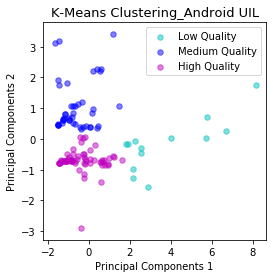

In [21]:
showClusters(new_df_android, "Android UIL", centroids_android)

## PhotoView 2.0

In [22]:
df_photoview_X = processDataFrame(df_photoview)

In [23]:
df_photoview_X.describe()

,WMC,DIT,NOC,RFC,CBO,LCOM
count,31.000000,31.000000,31.0,31.000000,31.000000,31.000000
mean,9.580645,1.677419,0.0,5.387097,6.612903,16.774194
std,19.234993,0.475191,0.0,11.179378,5.174794,28.814012
min,1.000000,1.000000,0.0,1.000000,3.000000,0.000000
25%,1.000000,1.000000,0.0,1.000000,4.000000,0.000000
50%,3.000000,2.000000,0.0,3.000000,5.000000,0.000000
75%,7.000000,2.000000,0.0,4.000000,6.000000,33.000000
max,100.000000,2.000000,0.0,52.000000,26.000000,94.000000


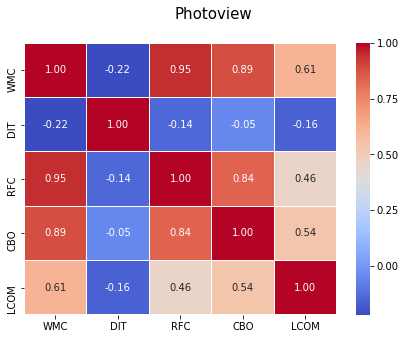

In [24]:
visualizeData(df_photoview_X[["WMC","DIT","RFC","CBO","LCOM"]], "Photoview")

In [25]:
pca_df_photoview = processTrainData(df_photoview_X)
pca_df_photoview.head()

,PCA1,PCA2
0,-0.558495,1.454719
1,1.897539,1.426261
2,-0.857304,-0.596389
3,3.679537,-1.475644
4,8.013326,0.421916


In [26]:
pca_df_photoview.describe()

,PCA1,PCA2
count,3.100000e+01,3.100000e+01
mean,1.253478e-16,2.148819e-17
std,1.823696e+00,1.009756e+00
min,-1.138910e+00,-1.475644e+00
25%,-8.756498e-01,-6.203909e-01
50%,-6.633075e-01,-5.382299e-01
75%,-2.071145e-01,1.429884e+00
max,8.013326e+00,1.619862e+00


In [27]:
model1 = initializeModel()
photoview_model = fitModel(pca_df_photoview, model1)
centroids_photoview, labels_photoview, inertia_photoview, numIter_photoview = predictQuality(pca_df_photoview,photoview_model)

In [28]:
print(labels_photoview)
print(centroids_photoview)
print(inertia_photoview)
print(numIter_photoview)

[2 2 0 1 1 2 2 0 0 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 2 2 0 0]
[[-0.61200471 -0.6060175 ]
 [ 4.55705736 -0.65435309]
 [-0.22700918  1.49748798]]
2
32.03896799155713


In [29]:
new_df_photoview= saveValues(pca_df_photoview, df_photoview,labels_photoview, "Photoview")
new_df_photoview.head()

,Kind,Name,WMC,DIT,NOC,RFC,CBO,LCOM,Assigned_Cluster,PCA1,PCA2,Predicted_Quality
0,Class,com.github.chrisbanes.photoview.Compat,3,1,0,2,5,0,2,-0.558495,1.454719,Medium
1,Class,com.github.chrisbanes.photoview.CustomGestureD...,27,1,0,7,10,74,2,1.897539,1.426261,Medium
2,Anonymous Class,com.github.chrisbanes.photoview.CustomGestureD...,4,2,0,3,4,0,0,-0.857304,-0.596389,High
3,Public Class,com.github.chrisbanes.photoview.PhotoView,46,2,0,41,18,9,1,3.679537,-1.475644,Low
4,Public Class,com.github.chrisbanes.photoview.PhotoViewAttacher,100,1,0,52,26,94,1,8.013326,0.421916,Low


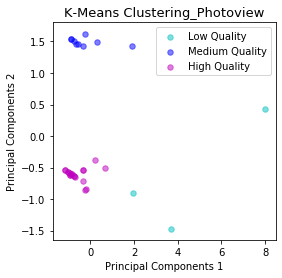

In [30]:
showClusters(new_df_photoview, "Photoview", centroids_photoview)

## Export outputs to Excel

In [31]:
writer = pd.ExcelWriter('Predicted.xlsx', engine='xlsxwriter')
new_df_piccasso.to_excel(writer, sheet_name='Picasso_2.8')
new_df_android.to_excel(writer, sheet_name='AndroidUIL_1.9.5')
new_df_photoview.to_excel(writer, sheet_name='PhotoView_2.0')
writer.save()